In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#---------------Pranav's datset file paths

#df_age_gender=pd.read_csv('/mnt/e/College/Sem 5/ML_Project/airbnb-new-user/age_gender_bkts.csv')
#df_countries=pd.read_csv('/mnt/e/College/Sem 5/ML_Project/airbnb-new-user/countries.csv')
#df_sample=pd.read_csv('/mnt/e/College/Sem 5/ML_Project/airbnb-new-user/sample_submission_NDGC_3.csv')
#df_session=pd.read_csv('/mnt/e/College/Sem 5/ML_Project/airbnb-new-user/sessions.csv')
#df_test=pd.read_csv('/mnt/e/College/Sem 5/ML_Project/airbnb-new-user/test.csv')
#df_train=pd.read_csv('/mnt/e/College/Sem 5/ML_Project/airbnb-new-user/train.csv')
#---------------Udith's datset file paths
df_age_gender=pd.read_csv('/home/udith/Desktop/5th_sem/ML Project/airbnb-new-user/age_gender_bkts.csv')
df_countries=pd.read_csv('/home/udith/Desktop/5th_sem/ML Project/airbnb-new-user/countries.csv')
df_sample=pd.read_csv('/home/udith/Desktop/5th_sem/ML Project/airbnb-new-user/sample_submission_NDGC_3.csv')
df_session=pd.read_csv('/home/udith/Desktop/5th_sem/ML Project/airbnb-new-user/sessions.csv')
df_test=pd.read_csv('/home/udith/Desktop/5th_sem/ML Project/airbnb-new-user/test.csv')
df_train=pd.read_csv('/home/udith/Desktop/5th_sem/ML Project/airbnb-new-user/train.csv')


#---------------Naveen's datset file paths



In [3]:
df_train.shape

(170137, 16)

In [4]:
def stacked_bar(feature):
    ctab = pd.crosstab([df_train[feature].fillna('Unknown')], df_train.country_destination, dropna=False).apply(lambda x: x/x.sum(), axis=1)
    ctab[classes].plot(kind='bar', stacked=True, colormap='terrain', legend=False)

In [5]:
classes = ['NDF','US','other','FR','IT','GB','ES','CA','DE','NL','AU','PT']

In [6]:
labels = df_train.country_destination.values
id_test = df_test.id
df_train.drop(['country_destination'], axis = 1)

#Concatenating train and test data for EDA
df_all = pd.concat((df_train, df_test), axis = 0, ignore_index= True)

In [7]:
df_all.shape

(213451, 16)

In [8]:
df_all.head(30)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,osr2jwljor,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,lsw9q7uk0j,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,0d01nltbrs,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,a1vcnhxeij,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758


In [9]:
df_all.isnull().sum() 


affiliate_channel               0
affiliate_provider              0
age                         87990
country_destination         43314
date_account_created            0
date_first_booking         124543
first_affiliate_tracked      6065
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
age                        125461 non-null float64
country_destination        170137 non-null object
date_account_created       213451 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    207386 non-null object
first_browser              213451 non-null object
first_device_type          213451 non-null object
gender                     213451 non-null object
id                         213451 non-null object
language                   213451 non-null object
signup_app                 213451 non-null object
signup_flow                213451 non-null int64
signup_method              213451 non-null object
timestamp_first_active     213451 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [11]:
df_all = df_all.drop(['id','country_destination','date_first_booking'], axis = 1)

In [12]:
for i in df_all.columns:
    null_check = df_all[i].isnull().sum()
    if null_check != 0:
        print(i + " has {} null values.".format(null_check))
        print()

age has 87990 null values.

first_affiliate_tracked has 6065 null values.



In [13]:
df_all.head(10)

,affiliate_channel,affiliate_provider,age,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105
5,other,other,NaN,2010-01-01,omg,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,2010-01-02,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100102012558
7,direct,direct,47.0,2010-01-03,omg,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,2010-01-04,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,en,Web,0,basic,20100104023758


In [14]:
df_all.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [15]:
df_all.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [16]:
#changing the outlier values to null/NaN

#df_all[df_all['age']<15].age = np.nan
#df_all[df_all['age']>=100].age = np.nan
df_train['age'] = df_train['age'].apply(lambda x: np.nan if x > 120 else x)
df_train['age'] = df_train['age'].apply(lambda x: np.nan if x < 15 else x)

In [17]:
df_train.head(50)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [18]:
df_all.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [19]:
categorical_features = ['affiliate_channel','affiliate_provider','first_affiliate_tracked','first_browser','first_device_type',
    'gender','language','signup_app','signup_method','signup_flow']

for categorical_feature in categorical_features:
    df_all[categorical_feature] = df_all[categorical_feature].astype('category')

In [20]:
df_all['date_account_created']=pd.to_datetime(df_all['date_account_created'])
df_all['timestamp_first_active']= pd.to_datetime(df_all['timestamp_first_active'], format='%Y%m%d%H%M%S')

# Visualizations

In [21]:
sns.set_style('whitegrid')
sns.set_context("talk")

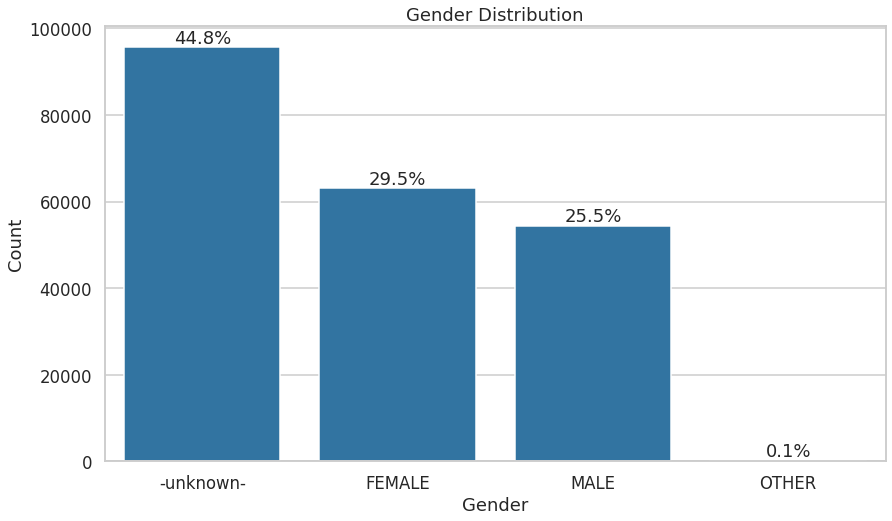

In [22]:
plt.figure(figsize=(14,8))
order1 = df_all['gender'].value_counts().index
sns.countplot(data = df_all, x = 'gender', order = order1, color = sns.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
order2 = df_all['gender'].value_counts()

for i in range(order2.shape[0]):
    count=order2[i]
    strt='{:0.1f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+1000,strt,ha='center')

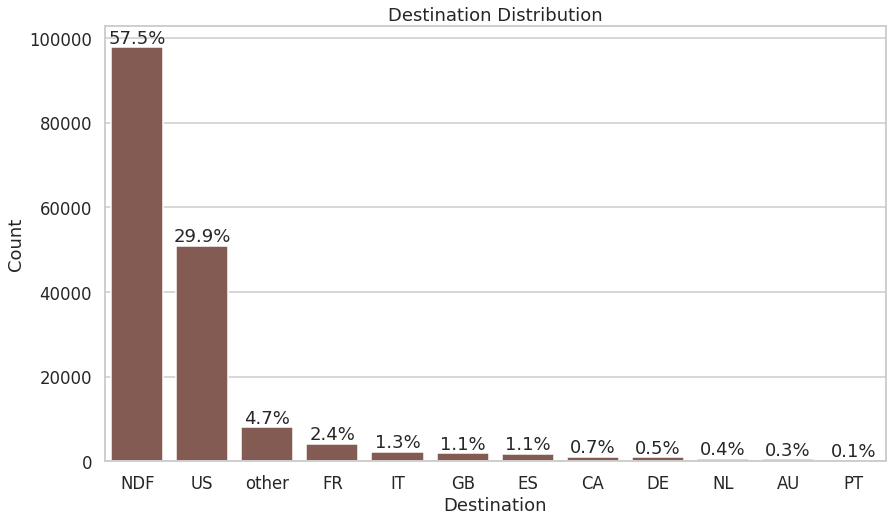

In [23]:
plt.figure(figsize=(14,8))
order1=df_train['country_destination'].value_counts().index
sns.countplot(data=df_train,x = 'country_destination',order=order1, color=sns.color_palette()[5])
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination Distribution')
order2 = df_train['country_destination'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / df_train.shape[0])
    plt.text(i,count+1000,strt,ha='center')

Nearly 60% of the users have never booked on AirBnB

In [24]:
#Extracting year for date_account_created
df_all['acc_year'] = df_all['date_account_created'].dt.year


df1 = df_all.groupby('acc_year').count()
df1.head()

years = [2010,2011,2012,2013,2014]
yearsOrder=pd.api.types.CategoricalDtype(ordered=True, categories=years)
df1.reset_index(inplace = True)
df1.acc_year = df1.acc_year.astype(yearsOrder)

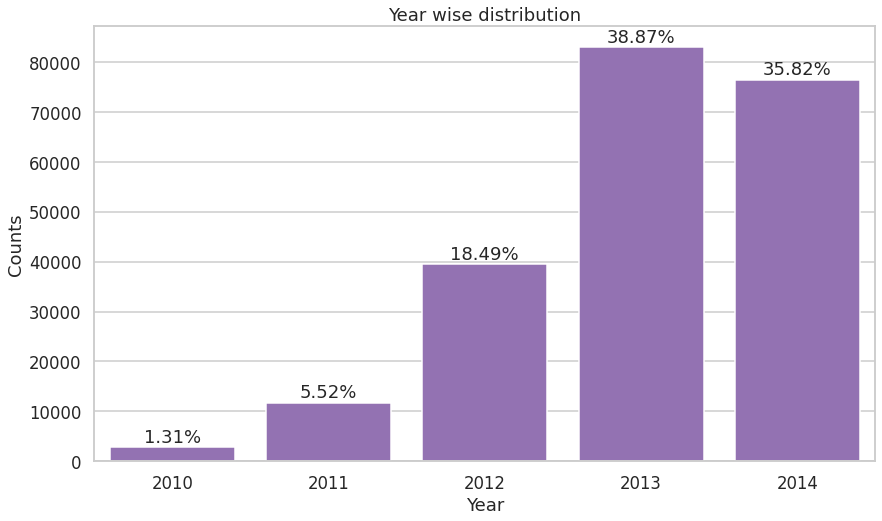

In [25]:
#Finding year-wise distribution

plt.figure(figsize=[14,8])
sns.barplot(data=df1,x='acc_year',y='affiliate_provider',color=sns.color_palette()[4]);
plt.title('Year wise distribution');
plt.xlabel('Year')
plt.ylabel('Counts')
for i in range(df1.shape[0]):
    count=df1.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+1000,strt,ha='center')

More accounts are created on 2013  

In [26]:
# Creating a month centered dataframe for 2014
df2 = df_all[df_all['date_account_created'].dt.year==2014]
df2['monthYear14'] = df2['date_account_created'].map(lambda x: x.strftime('%m-%Y'))
df2 = df2.groupby('monthYear14').count()

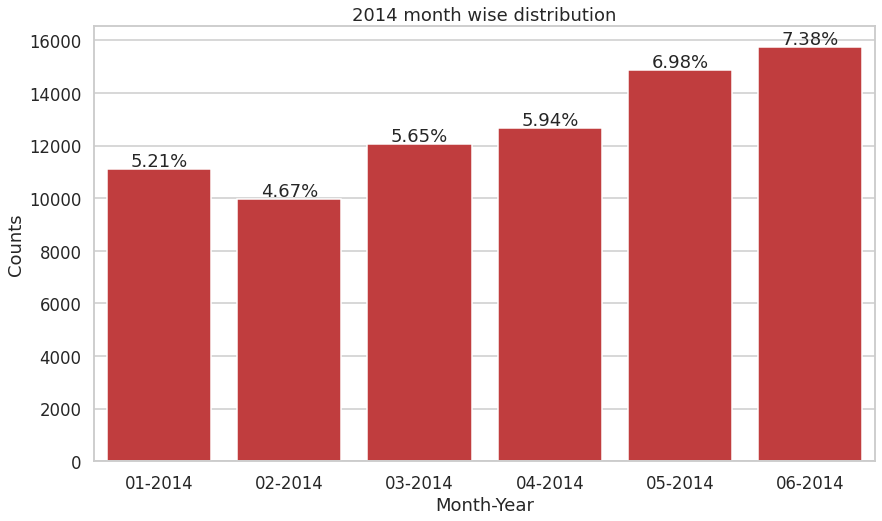

In [27]:
#Number of accounts created in different month of 2014

plt.figure(figsize=[14,8])
sns.barplot(data=df2,x=df2.index,y='affiliate_provider',color=sns.color_palette()[3]);
plt.title('2014 month wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')
for i in range(df2.shape[0]):
    count=df2.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+100,strt,ha='center')

In [28]:
#Dividing the member ages into various bins 

df_all['member_age_bins']=df_all['age'].apply(lambda x: '18 - 20' if 18<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60-70' if 60<x<=70
                                                  else '70+' if 70<x<=100
                                                  else np.nan)


In [29]:
df_all.head(10)

,affiliate_channel,affiliate_provider,age,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,acc_year,member_age_bins
0,direct,direct,NaN,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,2009-03-19 04:32:55,2010,NaN
1,seo,google,38.0,2011-05-25,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,2009-05-23 17:48:09,2011,30 - 40
2,direct,direct,56.0,2010-09-28,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,2009-06-09 23:12:47,2010,50 - 60
3,direct,direct,42.0,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,2009-10-31 06:01:29,2011,40 - 50
4,direct,direct,41.0,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,2009-12-08 06:11:05,2010,40 - 50
5,other,other,NaN,2010-01-01,omg,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,2010-01-01 21:56:19,2010,NaN
6,other,craigslist,46.0,2010-01-02,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,2010-01-02 01:25:58,2010,40 - 50
7,direct,direct,47.0,2010-01-03,omg,Safari,Mac Desktop,FEMALE,en,Web,0,basic,2010-01-03 19:19:05,2010,40 - 50
8,other,craigslist,50.0,2010-01-04,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,2010-01-04 00:42:11,2010,40 - 50
9,other,craigslist,46.0,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,en,Web,0,basic,2010-01-04 02:37:58,2010,40 - 50


In [30]:
df_age_gender.head(10)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


In [31]:
# Creating a month centered dataframe for 2013

df3 = df_all[df_all['date_account_created'].dt.year==2013]
df3['monthYear13'] = df3['date_account_created'].map(lambda x: x.strftime('%m-%Y'))
df3 = df3.groupby('monthYear13').count()

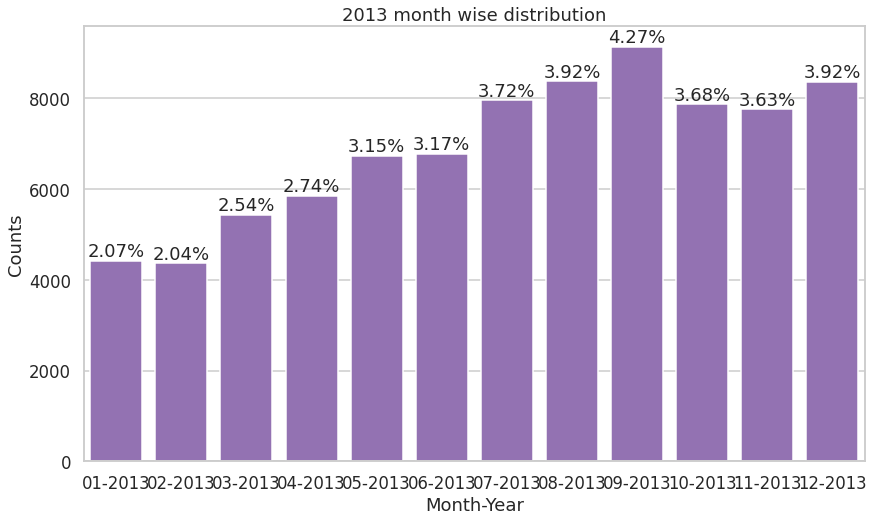

In [32]:
#Number of accounts created in different month of 2013

plt.figure(figsize=[14,8])
sns.barplot(data=df3,x=df3.index,y='affiliate_provider',color=sns.color_palette()[4]);
plt.title('2013 month wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')
for i in range(df3.shape[0]):
    count=df3.iloc[i]['affiliate_provider']
    strt='{:0.2f}%'.format(100*count/df_all.shape[0])
    plt.text(i,count+100,strt,ha='center')

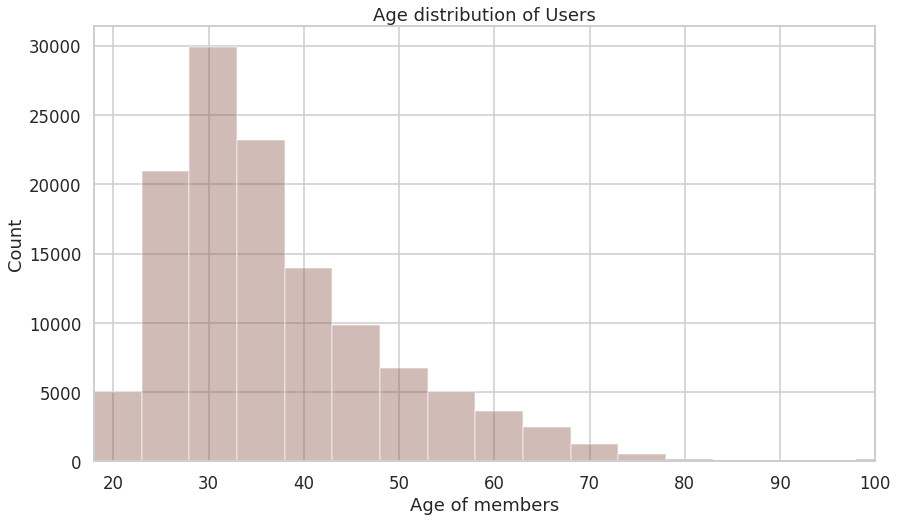

In [33]:
#Plotting Age distribution of the members
plt.figure(figsize=[14,8])
sns.distplot(df_all.age.dropna(),bins=np.arange(18,100+5,5),color=sns.color_palette()[5],kde=False);
plt.xlabel('Age of members')
plt.ylabel('Count')
plt.title('Age distribution of Users')
plt.xlim(18,100);

BIVARIATE PLOTS

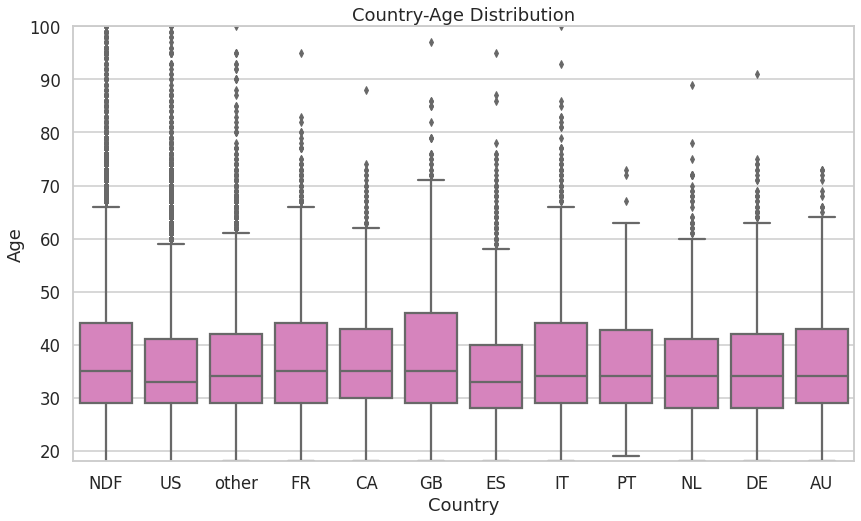

In [34]:
#Destination-Age distribution plot

plt.figure(figsize=[14,8])
sns.boxplot(data=df_train,y='age',x='country_destination',color=sns.color_palette()[6]);
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

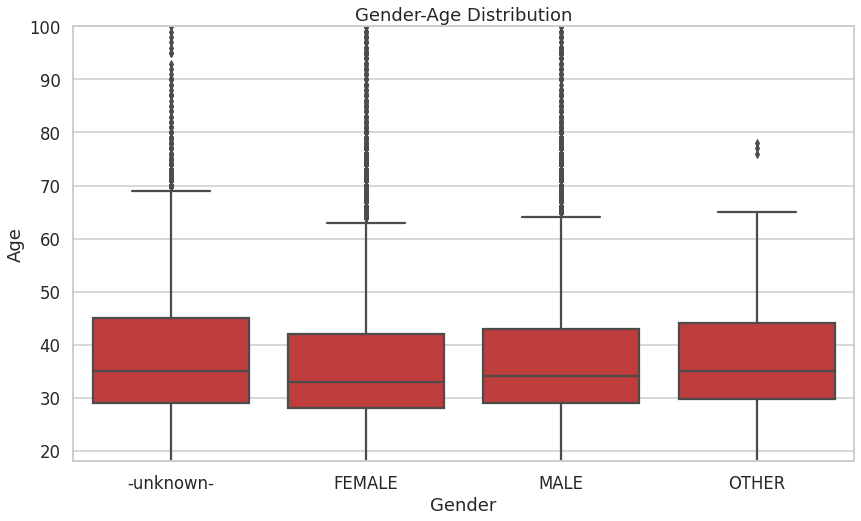

In [35]:
#Gender-Age Distribution plot

plt.figure(figsize=[14,8])
sns.boxplot(data=df_all,y='age',x='gender',color=sns.color_palette()[3]);
plt.ylim(18,100)
plt.xlabel('Gender');
plt.ylabel('Age');
plt.title('Gender-Age Distribution');

<AxesSubplot:>

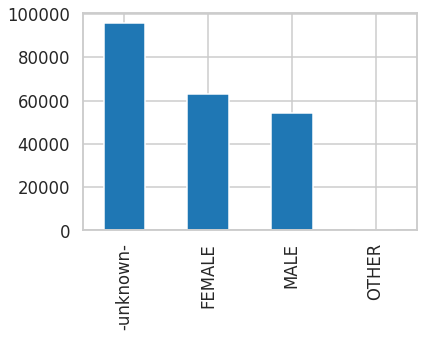

In [36]:
df_all.loc[df_all['gender'] == '-unknown-', 'gender']
df_all.gender.value_counts(dropna=True).plot(kind='bar')

We see that the users whose gender is unknown form the majority. Out of the users whose gender is known, there are more females than males.One very interesting point of note is that people who haven't marked their gender are less likely to book an Airbnb. Also, people who have marked themselves as 'other' are more likely than any other group to make a booking.

In [37]:
df3 = df_all[df_all['date_account_created'].dt.year==2013]
df3['monthYear13'] = df3['date_account_created'].map(lambda x: x.strftime('%m-%Y'))

df3= df3.groupby(['monthYear13','member_age_bins']).count()

df3.reset_index(inplace=True)

Text(0, 0.5, 'Counts')

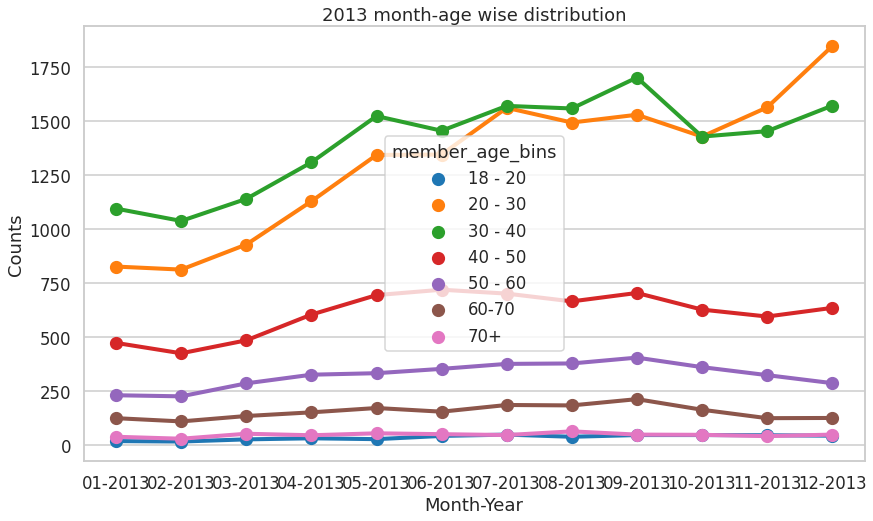

In [38]:
#Age wise distribution of the booking in different months of 2013

plt.figure(figsize=[14,8])
sns.pointplot(data=df3,x='monthYear13',y='affiliate_provider',hue='member_age_bins');
plt.title('2013 month-age wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')

In [39]:
df3 = df_all[df_all['date_account_created'].dt.year==2013]
df3['monthYear13'] = df3['date_account_created'].map(lambda x: x.strftime('%m-%Y'))

df3= df3.groupby(['monthYear13','gender']).count()

df3.reset_index(inplace=True)

Text(0, 0.5, 'Counts')

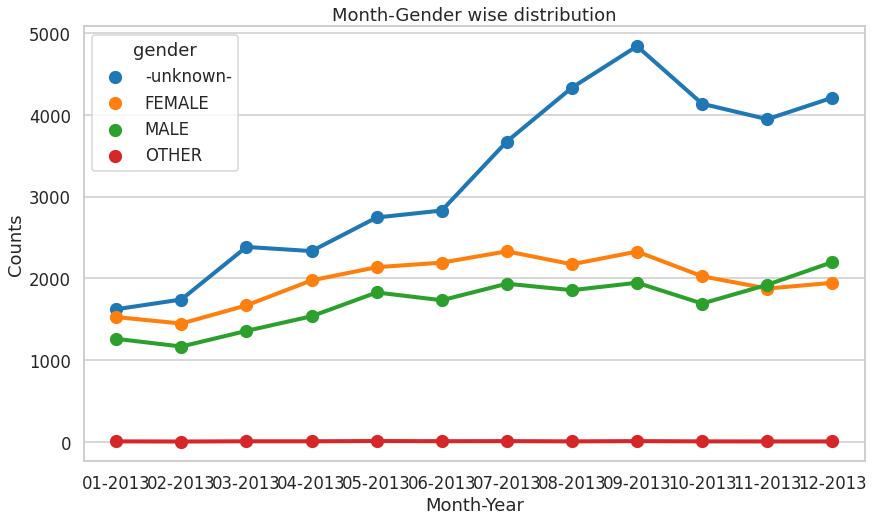

In [40]:
#Gender wise distribution of the booking in different months of 2013

plt.figure(figsize=[14,8])
sns.pointplot(data=df3,x='monthYear13',y='affiliate_provider',hue='gender');
plt.title('Month-Gender wise distribution');
plt.xlabel('Month-Year')
plt.ylabel('Counts')

Affilatate channel and device type

<AxesSubplot:xlabel='affiliate_provider', ylabel='count'>

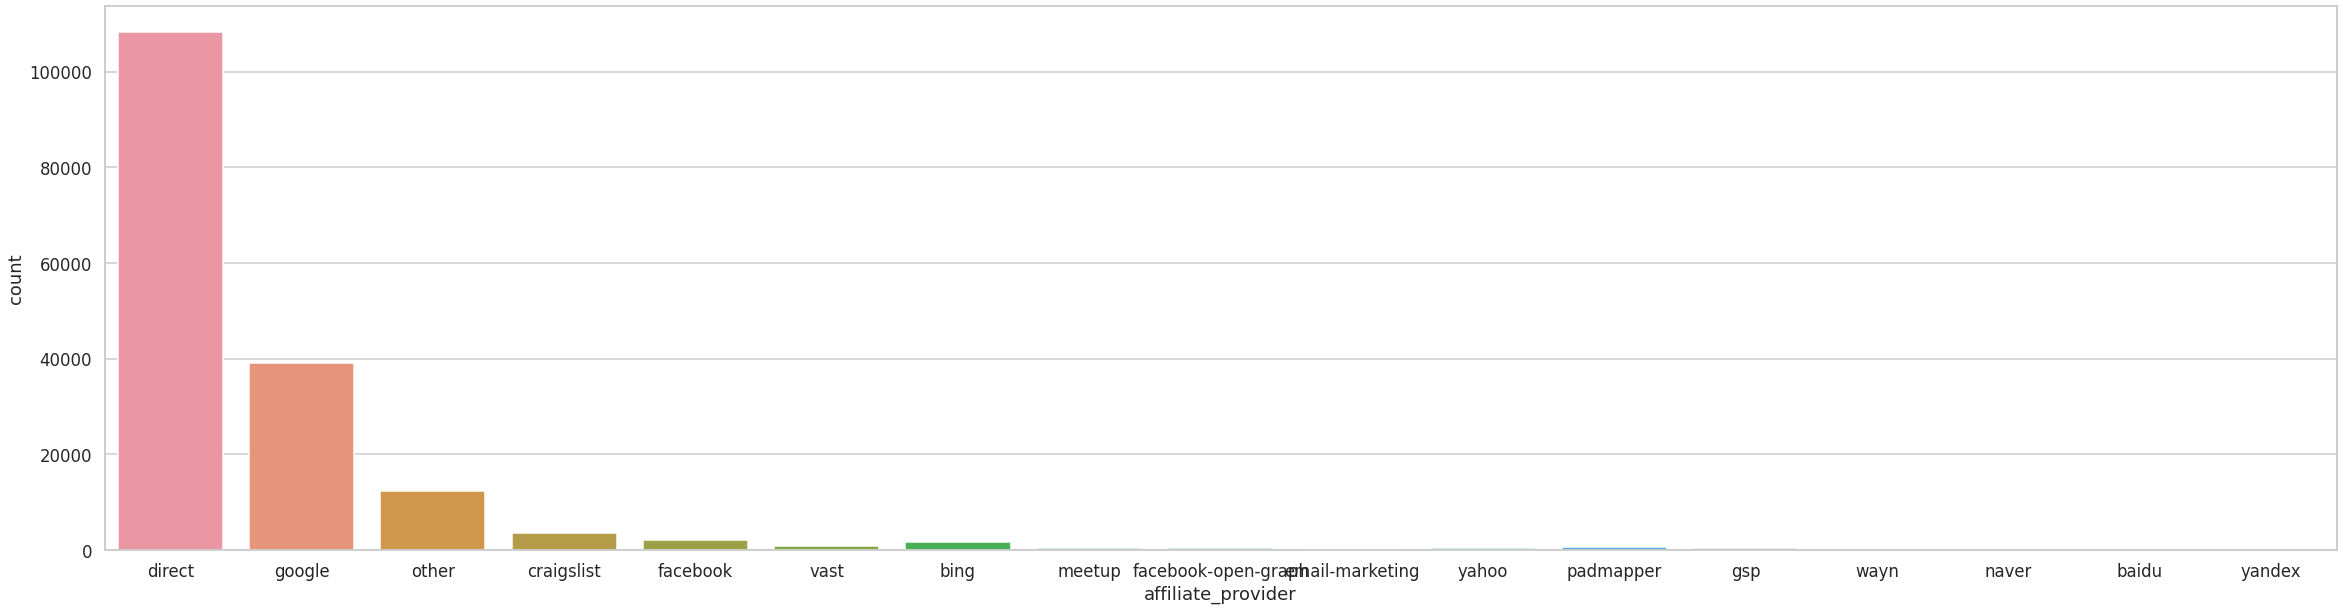

In [41]:
#Affilatate PROVIDERS vs user count

plt.figure(figsize=(40,10))
sns.countplot(df_train['affiliate_provider'])

<AxesSubplot:xlabel='affiliate_channel', ylabel='count'>

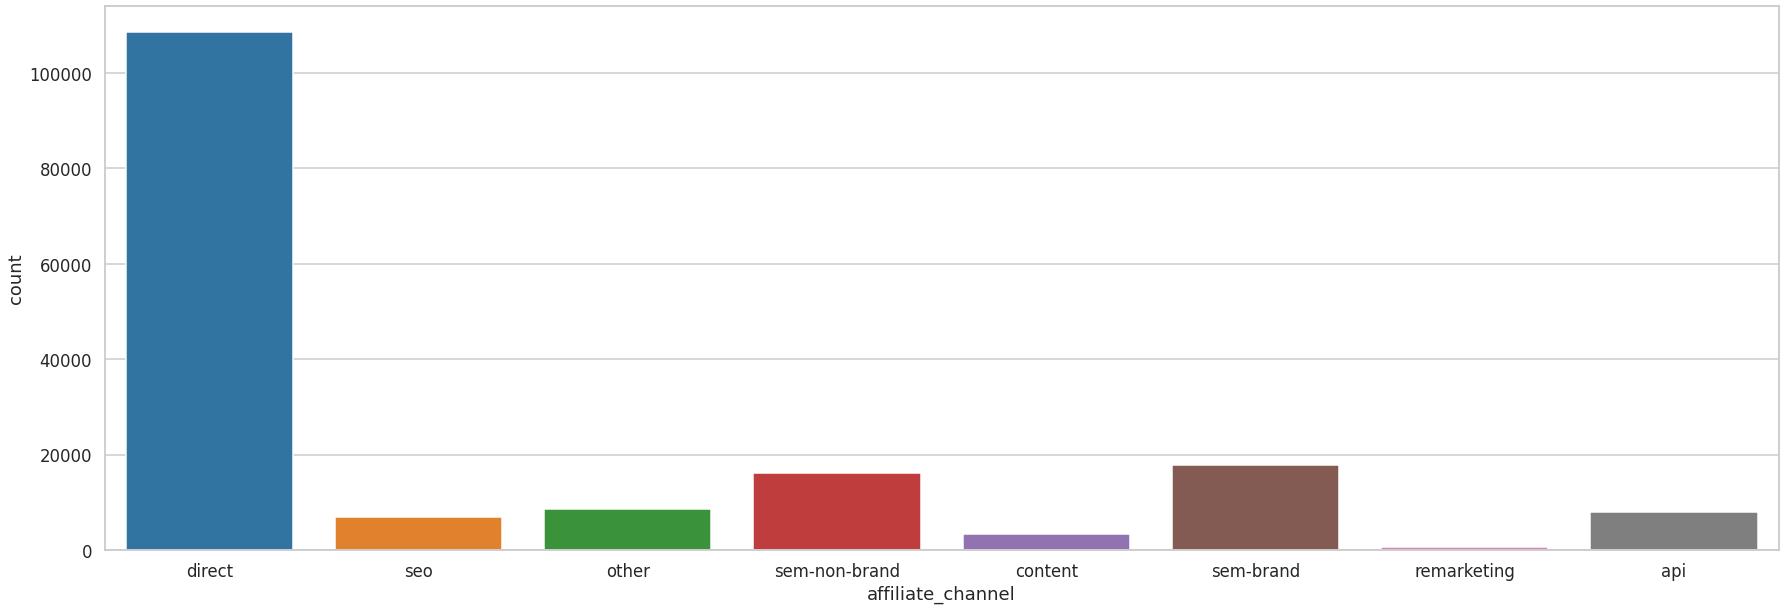

In [42]:
#Affilatate CHEANNELS vs user count

plt.figure(figsize=(30,10))
sns.countplot(df_train['affiliate_channel'])

The Direct Channel has the most number of conversions to bookings

Direct and Google are the most popular affiliate providers.

<AxesSubplot:xlabel='count', ylabel='device_type'>

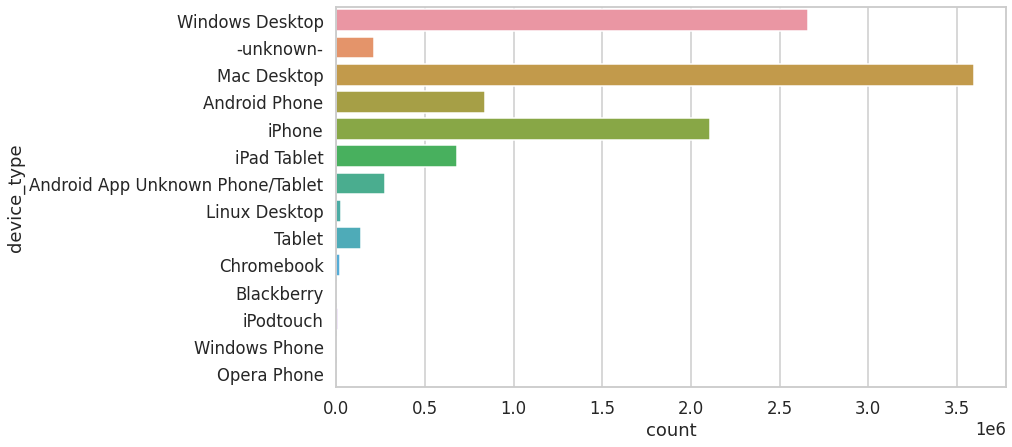

In [43]:
plt.figure(figsize=(12,7))
sns.countplot(y='device_type', data=df_session)

Signup method

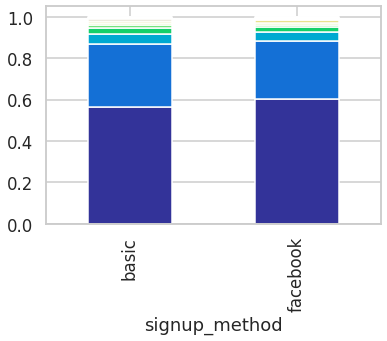

In [44]:
stacked_bar('signup_method')

Basic signup method are most likely to book an Airbnb whereas people who use google are least likely to make a booking.

*Signup Flow*

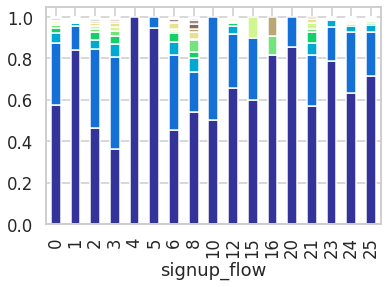

In [45]:
stacked_bar('signup_flow')

Users with signup flow 4 and 5 have never made a booking as shown above.

Where as people with signup flow 3 are most likely to book on Airbnb

Language

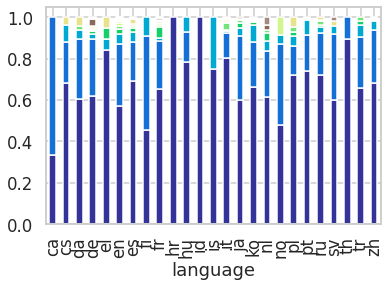

In [46]:
stacked_bar('language')

We see that people who speak Hungarian and Indonesian made almost no bookings.People who spoke Finnish made the most bookings amongst all languages.

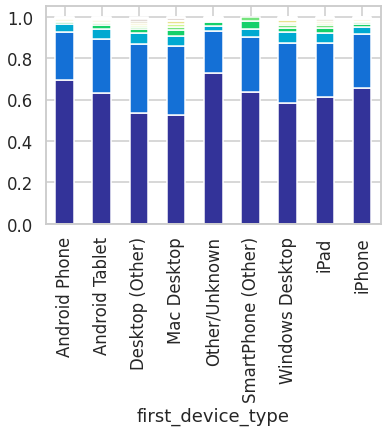

In [47]:
stacked_bar('first_device_type')

Users using the Web App are most likely to book an Airbnb, people on Desktops bought more.

Android Users are least likely to do so.

In [48]:
df_train[df_train['age'] > 120].head(30)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


We see that some of the users in the dataset have ages greater than 120, when the age of the oldest person living currently is 114 years old.

So we replace the ages of people older than 120 years as null or NaN 

In [49]:
df_train['age'] = df_train['age'].apply(lambda x: np.nan if x > 120 else x)

In [50]:
df_train[df_train['age'] > 120].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


In [51]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [52]:
#Catgorical data with null values count in each column
df_train.isnull().sum() 


id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         97807
gender                         0
age                        69559
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked     6027
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
dtype: int64

In [53]:
df_cat_impute=df_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [54]:
df_cat_impute.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,2014-01-17,-unknown-,30.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,2014-01-17,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,30.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [55]:
cat_data = df_cat_impute.select_dtypes(include=['object']).copy()

In [56]:
cat_data.head(20)

,id,date_account_created,date_first_booking,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2014-01-17,-unknown-,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2014-01-17,MALE,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2010-08-02,FEMALE,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2012-09-08,FEMALE,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2010-02-18,-unknown-,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-02,-unknown-,basic,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-05,FEMALE,basic,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-13,FEMALE,basic,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-07-29,FEMALE,basic,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04,-unknown-,basic,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [57]:
df_signup = df_train[(df_train['signup_method'] != 'google')][['id', 'signup_method', 'signup_app']]
df_signup['device'] = df_signup['signup_app'].apply(lambda x: 'Computer' if x == 'Web' else 'Mobile')
df_signup.head(10)

,id,signup_method,signup_app,device
0,gxn3p5htnn,facebook,Web,Computer
1,820tgsjxq7,facebook,Web,Computer
2,4ft3gnwmtx,basic,Web,Computer
3,bjjt8pjhuk,facebook,Web,Computer
4,87mebub9p4,basic,Web,Computer
5,osr2jwljor,basic,Web,Computer
6,lsw9q7uk0j,basic,Web,Computer
7,0d01nltbrs,basic,Web,Computer
8,a1vcnhxeij,basic,Web,Computer
9,6uh8zyj2gn,basic,Web,Computer


In [58]:
df_signup['signup_method'].value_counts()

basic       120444
facebook     49693
Name: signup_method, dtype: int64

In [59]:
df_signup['device'].value_counts()

Computer    150625
Mobile       19512
Name: device, dtype: int64

In [60]:
df_signup = df_signup.pivot_table('id', ['device'], 'signup_method', aggfunc='count')
df_signup.index = ['Computer', 'Mobile']
df_signup.columns = ['Basic', 'Facebook']
df_signup

,Basic,Facebook
Computer,106411,44214
Mobile,14033,5479


We will do chi square test

In [61]:
chi2, p, dof, expected = stats.chi2_contingency(df_signup, correction=False)

In [62]:
chi2

13.550036469823599

In [63]:
p

0.00023228690983386084

p is greater than chi2 so there is a relationship

In [64]:
df_inf = df_train[(df_train['country_destination'] != 'NDF') & (df_train['country_destination'] != 'other') & (df_train['gender'] != 'OTHER') & (df_train['gender'].notnull())]
df_inf = df_inf[['id', 'gender', 'country_destination']]
df_inf.head()

,id,gender,country_destination
2,4ft3gnwmtx,FEMALE,US
4,87mebub9p4,-unknown-,US
5,osr2jwljor,-unknown-,US
6,lsw9q7uk0j,FEMALE,US
7,0d01nltbrs,FEMALE,US


In [65]:
df_inf['gender'].value_counts()

FEMALE       23870
-unknown-    20324
MALE         19930
Name: gender, dtype: int64

In [66]:
df_inf['country_destination'].value_counts()

US    50766
FR     4152
IT     2263
GB     1878
ES     1820
CA     1120
DE      903
NL      600
AU      460
PT      162
Name: country_destination, dtype: int64

In [67]:
observed = df_inf.pivot_table('id', ['gender'], 'country_destination', aggfunc='count').reset_index()
del observed.columns.name
observed = observed.set_index('gender')
observed

,AU,CA,DE,ES,FR,GB,IT,NL,PT,US
gender,,,,,,,,,,
-unknown-,119,372,228,561,1376,584,774,172,48,16090
FEMALE,187,366,320,695,1664,725,920,206,63,18724
MALE,154,382,355,564,1112,569,569,222,51,15952


chi square test

In [68]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [69]:
chi2

139.79748465728704

In [70]:
p

7.006630026310825e-21

As p is less than chi2, there is a relationship between gender and country destination

In [71]:
country_popularity = df_train[(df_train['country_destination'] != 'NDF') & (df_train['country_destination'] != 'other')]['country_destination'].value_counts()
country_distance = pd.Series(df_countries['distance_km'])
country_distance.index = df_countries['country_destination']
language_distance = pd.Series(df_countries['language_levenshtein_distance'])
language_distance.index = df_countries['country_destination']
country_area = pd.Series(df_countries['destination_km2'])
country_area.index = df_countries['country_destination']


(-0.6477960993562009, 0.04283396023626147)


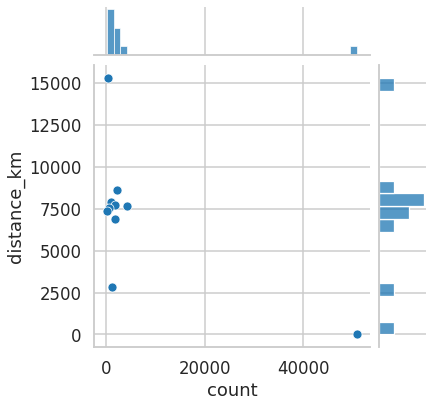

In [72]:
df_dp = pd.concat([country_popularity, country_distance, language_distance, country_area], axis=1)
df_dp.columns = ['count', 'distance_km', 'language', 'area']
sns.jointplot(x='count', y='distance_km', data=df_dp)
corr = pearsonr(df_dp['count'],df_dp['distance_km'])
print(corr)

Checking correlation without US

(-0.16291408899794232, 0.6753672357405509)


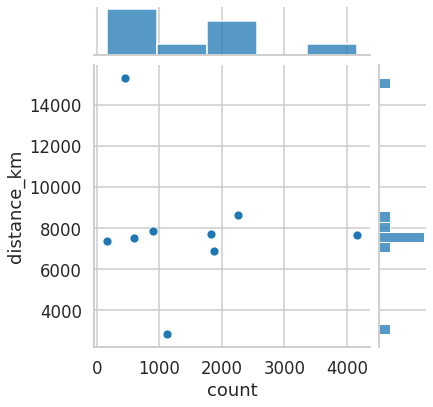

In [73]:
sns.jointplot(x='count', y='distance_km', data=df_dp.drop('US'))
ex = df_dp.drop('US')
corr = pearsonr(ex['count'],ex['distance_km'])
print(corr)

let us check if the language spoken in a particular country influences the number of bookings in that country.

(-0.3777887870876959, 0.2817789926754752)


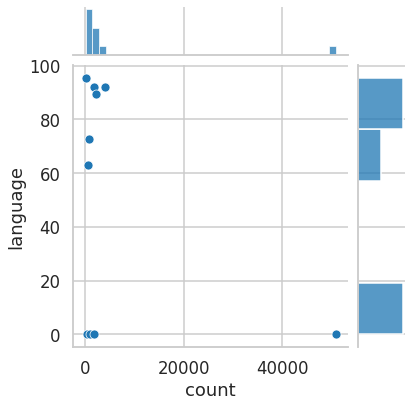

In [74]:
sns.jointplot(x='count', y='language', data=df_dp)
corr = pearsonr(df_dp['count'],df_dp['language'])
print(corr)

let us check correlation removing US

(0.28671685155510807, 0.45445328826881065)


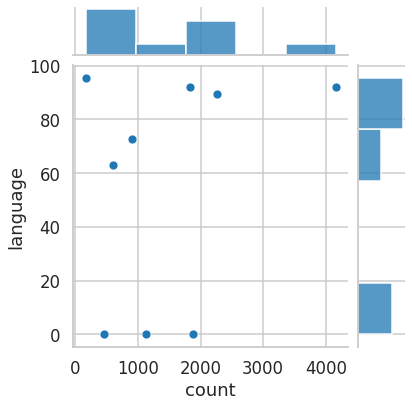

In [75]:
sns.jointplot(x='count', y='language', data=df_dp.drop('US'))
ex = df_dp.drop('US')
corr = pearsonr(ex['count'],ex['language'])
print(corr)

We see that when United States is removed from the list of countries, there is actually a positive correlation between language distance and booking frequency. Another way of looking at it would be that Europe is an extremely popular travel destination for Americans and they tend to prefer it to other English Speaking countries like Canada and Australia. So this may have nothing to do with language difference as it may have to do with destination preference.


(0.5386716228502756, 0.1081573830149214)


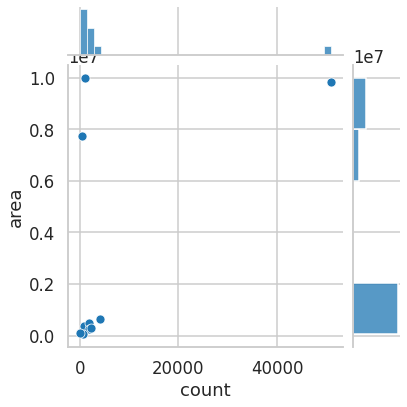

In [76]:
sns.jointplot(x='count', y='area', data=df_dp)
corr = pearsonr(df_dp['count'],df_dp['area'])
print(corr)

positive relation when US is present as US size is large and nagative correlation when US is removed because european countries are popular but area is small.

Session statistics 

<AxesSubplot:xlabel='secs_elapsed', ylabel='Density'>

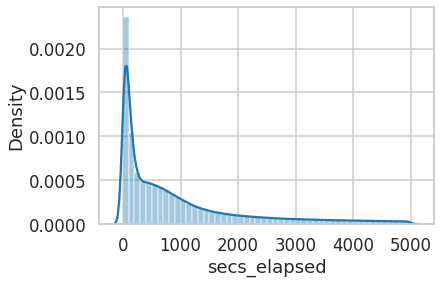

In [77]:
sns.distplot(df_session[(df_session['secs_elapsed'].notnull()) & (df_session['secs_elapsed'] < 5000)]['secs_elapsed'])

Distribution oof density of secs_elapsed from zero to 5000 secs_elapsed